In [1]:
import re 
import pandas as pd

In [2]:
f = open ('WhatsApp Chat with PUBG 💂_♀️.txt' , 'r' , encoding='utf-8')

In [3]:
data = f.read()

In [4]:
print(data) ## data is in string format our aim is to convert it into pandas format

28/04/2021, 01:31 - Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.
28/04/2021, 01:31 - You created group "PUBG 💂‍♀️"
28/04/2021, 22:53 - Deepanshu New: Aa rhw ho??
28/04/2021, 22:59 - K@rtik: Hn
28/04/2021, 23:00 - Deepanshu New: Aajaoo
28/04/2021, 23:00 - Deepanshu New: Waiting game mei
28/04/2021, 23:01 - K@rtik: Hn
28/04/2021, 23:02 - Yashika: Hn
28/04/2021, 23:05 - Deepanshu New: Kartik aaja bhai
28/04/2021, 23:05 - Deepanshu New: Wait kr rhe h hum
28/04/2021, 23:07 - Pranav: Aya
28/04/2021, 23:07 - Pranav: Jagah h to on kru abhi ?
29/04/2021, 23:09 - Pranav: Aana h?
29/04/2021, 23:10 - Deepanshu New: Hnnn
29/04/2021, 23:10 - Deepanshu New: Aajaaaaa
29/04/2021, 23:11 - K@rtik: Me 11:30
29/04/2021, 23:11 - Pranav: Aaja kya krega
29/04/2021, 23:11 - Deepanshu New: This message was deleted
29/04/2021, 23:11 - Pranav: Aya
29/04/2021, 23:11 - Deepanshu New: Hnn
29/04/2021, 23:11 - Deepanshu New:

In [5]:
pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'

In [6]:
messages = re.split(pattern,data)[1:]
len(messages)

4104

In [7]:
dates = re.findall(pattern , data)
len(dates)

4104

In [8]:
## making a separate dataframe where one cloumn will have all messgaes and one will have all datae
df = pd.DataFrame({'user_message' : messages , 'message_date':dates})
df['message_date'] = pd.to_datetime(df['message_date'] , format = '%d/%m/%Y, %H:%M - ')
df.rename(columns = {'message_date' : 'date'} , inplace = True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2021-04-28 01:31:00
1,"You created group ""PUBG 💂‍♀️""\n",2021-04-28 01:31:00
2,Deepanshu New: Aa rhw ho??\n,2021-04-28 22:53:00
3,K@rtik: Hn\n,2021-04-28 22:59:00
4,Deepanshu New: Aajaoo\n,2021-04-28 23:00:00


In [9]:
df.shape

(4104, 2)

In [10]:
## separating using name and message 
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s',message)
    if entry[1:]: #user name
        users.append(entry[1])
        messages.append(entry[2])
    else :
        users.append('group_notification')
        messages.append(entry[0])
df['user'] = users
df['message'] = messages
df.drop(columns = ['user_message'], inplace = True)
df.head()

,date,user,message
0,2021-04-28 01:31:00,group_notification,Messages and calls are end-to-end encrypted. N...
1,2021-04-28 01:31:00,group_notification,"You created group ""PUBG 💂‍♀️""\n"
2,2021-04-28 22:53:00,Deepanshu New,Aa rhw ho??\n
3,2021-04-28 22:59:00,K@rtik,Hn\n
4,2021-04-28 23:00:00,Deepanshu New,Aajaoo\n


In [11]:
## splitting date coloumn
df['year'] = df['date'].dt.year

In [12]:
df['month'] = df['date'].dt.month_name()

In [13]:
df['day']  = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute

In [14]:
df.head()

,date,user,message,year,month,day,hour,minute
0,2021-04-28 01:31:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,April,28,1,31
1,2021-04-28 01:31:00,group_notification,"You created group ""PUBG 💂‍♀️""\n",2021,April,28,1,31
2,2021-04-28 22:53:00,Deepanshu New,Aa rhw ho??\n,2021,April,28,22,53
3,2021-04-28 22:59:00,K@rtik,Hn\n,2021,April,28,22,59
4,2021-04-28 23:00:00,Deepanshu New,Aajaoo\n,2021,April,28,23,0


In [15]:
## preprocessing done 

In [16]:
words = []
for message in df['message']:
    words.extend(message.split())
len(words)

13672

In [17]:
#pip install urlextract

In [18]:
from urlextract import URLExtract
extractor = URLExtract()
links = []
for message in df['message']:
    links.extend(extractor.find_urls(message))
len(links)

18

In [19]:
x = df['user'].value_counts().head()

In [20]:
import matplotlib.pyplot as plt

In [21]:
name = x.index
count = x.values

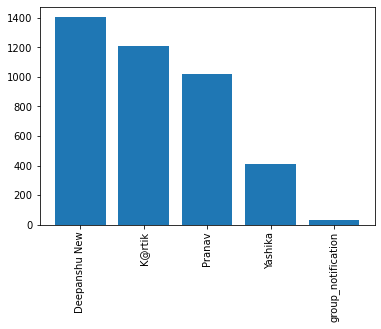

In [22]:
plt.bar(name,count)
plt.xticks(rotation = 'vertical')
plt.show()

In [23]:
#pip install matplotlib

In [24]:
round((df['user'].value_counts()/df.shape[0])*100,2).reset_index().rename(columns={'index':'name','user':'percent'})

,name,percent
0,Deepanshu New,34.19
1,K@rtik,29.48
2,Pranav,24.90
3,Yashika,10.01
4,group_notification,0.80
5,Vaibhav New,0.51
6,Ahad,0.10


In [27]:
## removing group notification 
temp = df[df['user'] != 'group_notification']
temp = temp[temp['message'] != '<Media omitted>\n']

In [38]:
f = open('/Users/kartik/Downloads/hinglish_stopwords.txt','r')
stop_words = f.read()

In [43]:
words = []

for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

In [44]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(20))

,0,1
0,hn,136
1,aajao,129
2,@919811443822,99
3,game,82
4,pubg,79
5,@919911130879,79
6,khel,75
7,kartik,61
8,@919818701004,59
9,pranav,54


In [45]:
pip install emoji

     |████████████████████████████████| 175 kB 2.3 MB/s eta 0:00:01
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171030 sha256=9ff94c5d44c613b86582746ac04f91afa0dc6b5e17584d211bf974a1a2bec4ba
  Stored in directory: /Users/kartik/Library/Caches/pip/wheels/5e/8c/80/c3646df8201ba6f5070297fe3779a4b70265d0bfd961c15302
Successfully built emoji
Note: you may need to restart the kernel to use updated packages.


In [46]:
import emoji

In [47]:
emojis = []
for message in df['message']:
    emojis.extend([c for c in message if c in emoji.UNICODE_EMOJI['en']])

In [48]:
pd.DataFrame(Counter(emojis).most_common(len(Counter(emojis))))

,0,1
0,😂,144
1,🏻,40
2,🥺,39
3,🥳,35
4,🕺,30
...,...,...
91,😨,1
92,🔥,1
93,🫡,1
94,🍻,1


In [49]:
df['month_num'] = df['date'].dt.month

In [53]:
timeline = df.groupby(['year', 'month_num','month']).count()['message'].reset_index()

In [54]:
timeline

,year,month_num,month,message
0,2021,4,April,46
1,2021,5,May,1398
2,2021,6,June,559
3,2021,7,July,339
4,2021,8,August,25
5,2021,9,September,18
6,2021,10,October,8
7,2021,11,November,9
8,2022,1,January,679
9,2022,2,February,398


In [55]:
time=[]
for i in range(timeline.shape[0]):
    time.append(timeline['month'][i]+"-"+str(timeline['year'][i]))

In [58]:
timeline['time'] = time
timeline

,year,month_num,month,message,time
0,2021,4,April,46,April-2021
1,2021,5,May,1398,May-2021
2,2021,6,June,559,June-2021
3,2021,7,July,339,July-2021
4,2021,8,August,25,August-2021
5,2021,9,September,18,September-2021
6,2021,10,October,8,October-2021
7,2021,11,November,9,November-2021
8,2022,1,January,679,January-2022
9,2022,2,February,398,February-2022


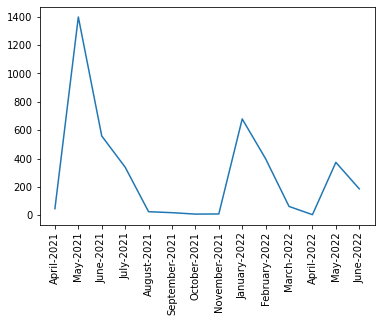

In [60]:
plt.plot(timeline['time'],timeline['message'])
plt.xticks(rotation='vertical')
plt.show()

In [61]:
df['only_date'] = df['date'].dt.date

In [71]:
daily_timeline = df.groupby('only_date').count()['message'].reset_index()
daily_timeline

,only_date,message
0,2021-04-28,12
1,2021-04-29,9
2,2021-04-30,25
3,2021-05-01,9
4,2021-05-02,31
...,...,...
128,2022-06-04,4
129,2022-06-05,27
130,2022-06-06,27
131,2022-06-07,4


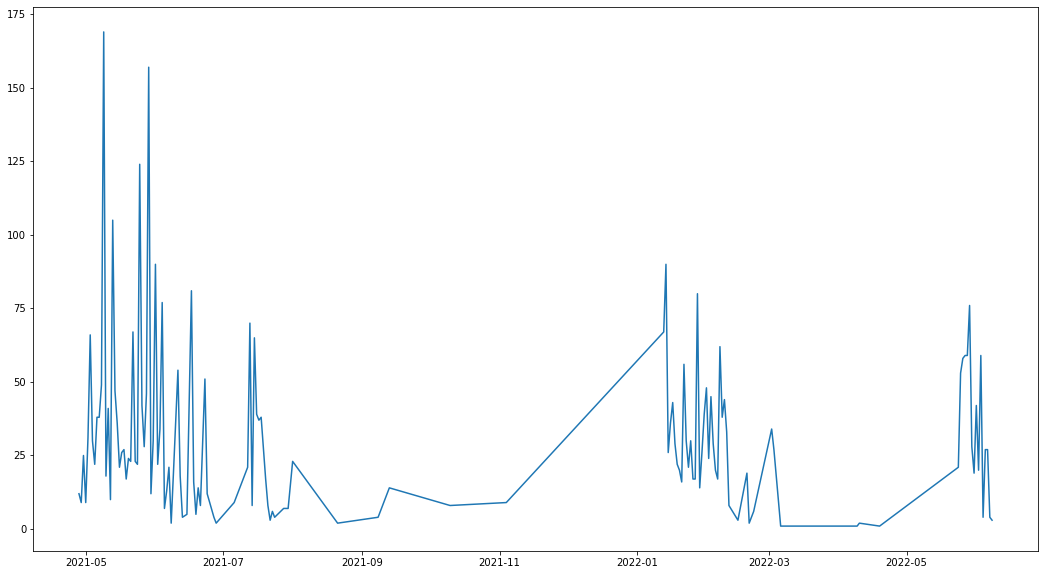

In [66]:
plt.figure(figsize=(18,10))
plt.plot(daily_timeline['only_date'],daily_timeline['message'])

In [70]:
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date
0,2021-04-28 01:31:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,April,28,1,31,4,2021-04-28
1,2021-04-28 01:31:00,group_notification,"You created group ""PUBG 💂‍♀️""\n",2021,April,28,1,31,4,2021-04-28
2,2021-04-28 22:53:00,Deepanshu New,Aa rhw ho??\n,2021,April,28,22,53,4,2021-04-28
3,2021-04-28 22:59:00,K@rtik,Hn\n,2021,April,28,22,59,4,2021-04-28
4,2021-04-28 23:00:00,Deepanshu New,Aajaoo\n,2021,April,28,23,0,4,2021-04-28


In [74]:
df['day_name'] = df['date'].dt.day_name()

In [75]:
df['day_name'].value_counts()

Friday       719
Thursday     695
Tuesday      614
Saturday     590
Sunday       577
Wednesday    461
Monday       448
Name: day_name, dtype: int64

In [76]:
## heat map 
# we will use hour col of hour dataframe for this 
period = []
for hour in df[['day_name','hour']]['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour+1))
    else:
        period.append(str(hour) + "-" + str(hour+1))

In [78]:
df['period'] = period 
df.head()

,date,user,message,year,month,day,hour,minute,month_num,only_date,daily_name,day_name,period
0,2021-04-28 01:31:00,group_notification,Messages and calls are end-to-end encrypted. N...,2021,April,28,1,31,4,2021-04-28,Wednesday,Wednesday,1-2
1,2021-04-28 01:31:00,group_notification,"You created group ""PUBG 💂‍♀️""\n",2021,April,28,1,31,4,2021-04-28,Wednesday,Wednesday,1-2
2,2021-04-28 22:53:00,Deepanshu New,Aa rhw ho??\n,2021,April,28,22,53,4,2021-04-28,Wednesday,Wednesday,22-23
3,2021-04-28 22:59:00,K@rtik,Hn\n,2021,April,28,22,59,4,2021-04-28,Wednesday,Wednesday,22-23
4,2021-04-28 23:00:00,Deepanshu New,Aajaoo\n,2021,April,28,23,0,4,2021-04-28,Wednesday,Wednesday,23-00


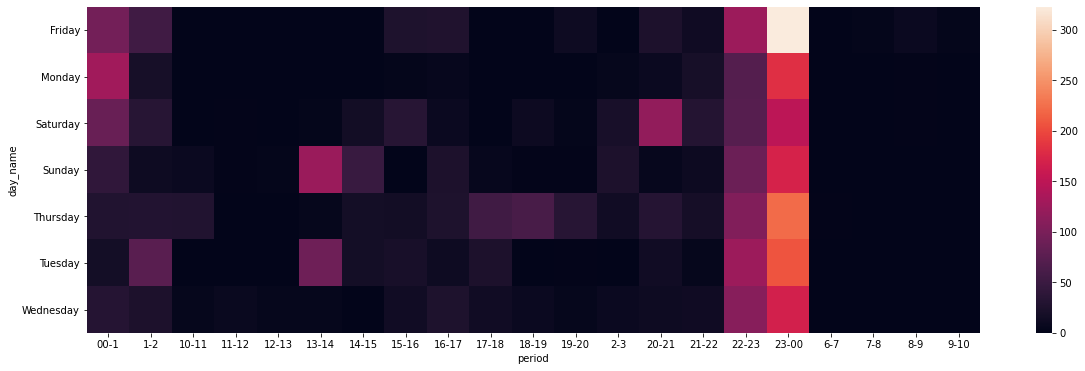

In [79]:
import seaborn as sns
plt.figure(figsize=(20,6))
sns.heatmap(df.pivot_table
            (index='day_name',columns='period',values='message',aggfunc = 'count').fillna(0))
plt.yticks(rotation='horizontal')
plt.show()
    

In [82]:
df.pivot_table(index='day_name',columns='period',values='message',aggfunc = 'count')

period,00-1,1-2,10-11,11-12,12-13,13-14,14-15,15-16,16-17,17-18,...,19-20,2-3,20-21,21-22,22-23,23-00,6-7,7-8,8-9,9-10
day_name,,,,,,,,,,,,,,,,,,,,,
Friday,95.0,55.0,NaN,NaN,NaN,1.0,1.0,26.0,27.0,NaN,...,12.0,1.0,24.0,13.0,125.0,323.0,NaN,3.0,9.0,3.0
Monday,129.0,19.0,NaN,1.0,NaN,1.0,NaN,3.0,6.0,NaN,...,NaN,5.0,9.0,19.0,71.0,182.0,NaN,1.0,2.0,NaN
Saturday,86.0,33.0,NaN,2.0,NaN,3.0,16.0,33.0,10.0,NaN,...,3.0,21.0,118.0,31.0,72.0,149.0,NaN,NaN,2.0,NaN
Sunday,41.0,12.0,10.0,2.0,3.0,124.0,49.0,NaN,25.0,6.0,...,2.0,24.0,6.0,11.0,89.0,171.0,NaN,NaN,NaN,NaN
Thursday,28.0,30.0,28.0,1.0,NaN,4.0,17.0,16.0,26.0,55.0,...,34.0,14.0,32.0,18.0,105.0,223.0,2.0,NaN,NaN,1.0
Tuesday,17.0,75.0,NaN,1.0,NaN,91.0,17.0,21.0,12.0,25.0,...,2.0,NaN,14.0,5.0,125.0,208.0,NaN,NaN,NaN,1.0
Wednesday,32.0,24.0,4.0,8.0,4.0,4.0,NaN,15.0,26.0,15.0,...,4.0,10.0,12.0,13.0,110.0,169.0,NaN,NaN,1.0,NaN
